In [81]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

## Default

In [20]:
np.random.seed(12345)
obs_dist = mixture_rvs([.25,.75], size=10000, dist=[stats.norm, stats.norm],
                kwargs = (dict(loc=-1,scale=.5),dict(loc=1,scale=.5)))

(array([   30.,   250.,   918.,   966.,   592.,  1617.,  3205.,  2017.,
          383.,    22.]),
 array([-2.76545576, -2.19403384, -1.62261191, -1.05118999, -0.47976806,
         0.09165386,  0.66307579,  1.23449771,  1.80591964,  2.37734156,
         2.94876349]),
 <a list of 10 Patch objects>)

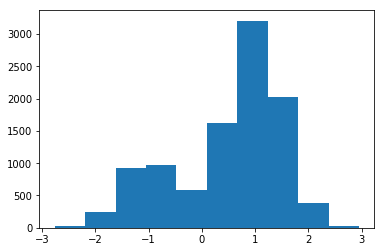

In [25]:
plt.hist(obs_dist)

# Pedro

In [27]:
import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market import market_data as mkt_data

In [28]:
mkt=mkt_data.MarketData()
returns = mkt.crypto_returns_history(
    symbols=['ADA', 'ADST', 'BIS', 'BTC', 'EMC2', 'ETH', 'FUN', 'IOTA', 'LTC', 'TRX', 'UBQ', 'XLM', 'XRP']
)

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [44]:
obs_dist = returns['BTC'].dropna().values

(array([   6.,    8.,   38.,  166.,  957.,  258.,   41.,   13.,    3.,    2.]),
 array([-0.21098965, -0.16431408, -0.11763851, -0.07096294, -0.02428737,
         0.0223882 ,  0.06906377,  0.11573934,  0.16241491,  0.20909048,
         0.25576605]),
 <a list of 10 Patch objects>)

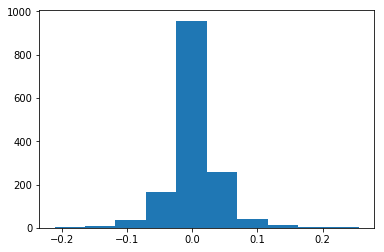

In [45]:
plt.hist(obs_dist)

# Rest of the code

In [46]:
kde = sm.nonparametric.KDEUnivariate(obs_dist)
kde.fit()

In [47]:
len(kde.density)

2048

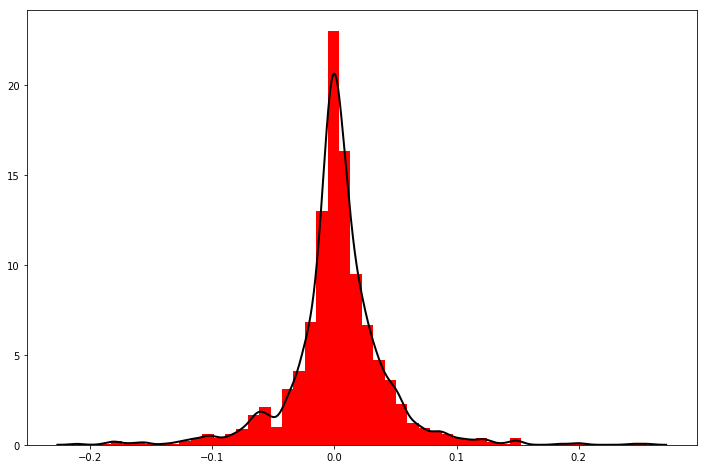

In [48]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(obs_dist, bins=50, normed=True, color='red')
ax.plot(kde.support, kde.density, lw=2, color='black')

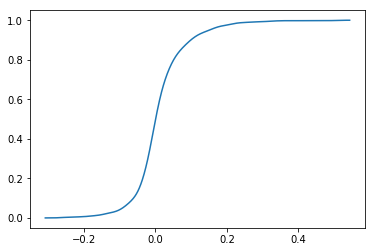

In [43]:
plt.plot(kde.support, kde.cdf)

# Multivariable

In [61]:
import statsmodels.api as sm
nobs = 300
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(size=(nobs,1))
c2 = np.random.normal(2, 1, size=(nobs,1))

dens_u = sm.nonparametric.KDEMultivariate(
    data=[c1,c2],
    var_type='cc',
    bw='normal_reference')
dens_u.bw

array([ 0.39967419,  0.38423292])

In [97]:
rets = returns.dropna()
rets_obs = rets.values.T
rets_obs

array([[ 0.05052552, -0.01639896, -0.13470029, ...,  0.02523926,
        -0.03657057, -0.00267816],
       [ 0.01159924,  0.27459483,  0.17097177, ..., -0.11176207,
        -0.02523114,  0.01492846],
       [-0.04798709, -0.09385234,  0.02968104, ..., -0.01307125,
        -0.05324717, -0.03647272],
       ..., 
       [-0.04443101, -0.01487255, -0.00335837, ..., -0.02500111,
        -0.02230302,  0.01401222],
       [-0.04726152,  0.23465201,  0.2663295 , ...,  0.05340035,
         0.02346688,  0.02314996],
       [ 0.05329817,  0.1077893 , -0.00960822, ..., -0.02829076,
        -0.06548387, -0.02331618]])

In [105]:
dens_u = sm.nonparametric.KDEMultivariate(
    data=rets_obs,
    var_type='c'*13,
    bw='normal_reference')
dens_u.bw

array([ 0.16021051,  0.1466641 ,  0.14213471,  0.05005531,  0.18402873,
        0.04854177,  0.10190837,  0.09522723,  0.07307481,  0.17843254,
        0.08805449,  0.12902709,  0.10943641])

In [104]:
pdf = dens_u.pdf()
rets['PDF'] = pdf
rets

C:\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ADA,ADST,BIS,BTC,EMC2,ETH,FUN,IOTA,LTC,TRX,UBQ,XLM,XRP,PDF
2017-10-04,0.050526,0.011599,-0.047987,-0.023236,-0.118873,-0.002203,-0.041141,-0.029032,-0.020979,0.324326,-0.044431,-0.047262,0.053298,3.762319e+05
2017-10-05,-0.016399,0.274595,-0.093852,0.027342,-0.085577,0.014808,-0.067997,-0.007302,0.009105,0.025453,-0.014873,0.234652,0.107789,3.031975e+05
2017-10-06,-0.134700,0.170972,0.029681,0.012815,0.178987,0.046145,-0.026483,-0.066483,0.011725,-0.094892,-0.003358,0.266330,-0.009608,2.976671e+05
2017-10-07,0.129565,-0.347873,0.033948,0.012831,-0.084889,0.008199,0.000304,0.069681,0.008826,-0.179239,-0.063694,0.138890,0.019531,2.982341e+05
2017-10-08,-0.022157,0.159161,-0.254074,0.041472,-0.082948,-0.008068,-0.083438,-0.071485,0.010650,0.028874,-0.142857,-0.112649,0.173228,2.532734e+05
2017-10-09,0.076358,0.168796,-0.091301,0.031601,-0.102581,-0.039556,-0.085968,-0.064301,-0.059212,-0.140807,-0.050781,-0.056750,-0.103432,4.029481e+05
2017-10-10,-0.030573,-0.090229,0.252140,-0.002243,0.001660,0.003980,0.086650,0.012938,0.006793,0.015764,0.111839,0.072159,0.030898,4.094384e+05
2017-10-11,0.043016,0.000360,0.200486,0.006488,0.228505,0.009149,0.065112,0.005329,0.000553,0.107016,0.019536,0.023360,0.011385,6.082783e+05
2017-10-12,0.163163,-0.126587,-0.060535,0.126072,0.191433,0.000043,0.010591,-0.145289,0.178585,-0.052689,-0.096875,-0.087661,-0.062660,2.400406e+05
2017-10-13,0.286456,-0.128481,-0.141960,0.040811,-0.092502,0.118168,-0.064704,0.074919,-0.007462,-0.095424,-0.068968,0.013830,0.052693,2.488948e+05
